In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from cbrain.imports import *
from matplotlib.animation import FuncAnimation
from IPython.display import SVG, HTML

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
DATA_DIR = '/scratch/05488/tg847872/fluxbypass_aqua/'

In [6]:
ds = xr.open_mfdataset(DATA_DIR+'AndKua_aqua_SPCAM3.0_sp_fluxbp.cam2.h1.0000-04*', decode_times=False, decode_cf=False)

In [30]:
ds2 = xr.open_mfdataset(DATA_DIR+'AndKua_aqua_SPCAM3.0_sp_fbp_f1.cam2.h1.0000-0*', decode_times=False, decode_cf=False)

In [57]:
ds3 = xr.open_mfdataset(DATA_DIR+'AndKua_aqua_SPCAM3.0_sp_fbp_f2.cam2.h1.0000-02*', decode_times=False)

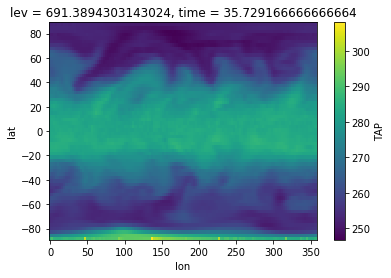

In [59]:
ds3['TAP'].isel(time=-2, lev=20).plot();

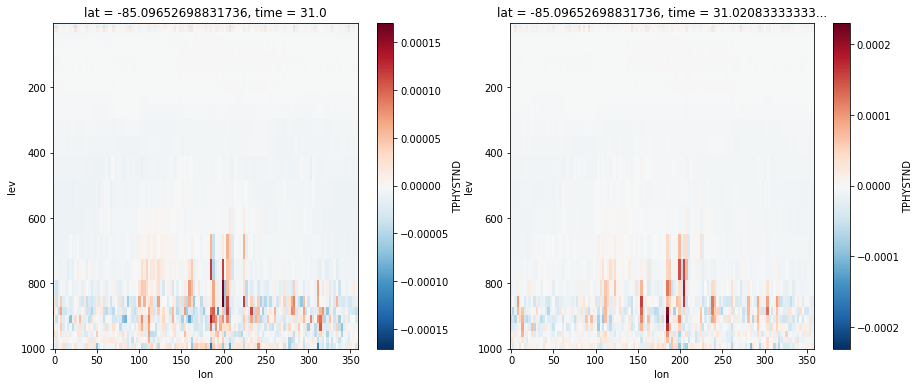

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ds3['TPHYSTND'].isel(time=0, lat=1).plot(ax=axes[0], yincrease=False)
ds3['TPHYSTND'].isel(time=1, lat=1).plot(ax=axes[1], yincrease=False);

In [10]:
ds.time.size

238

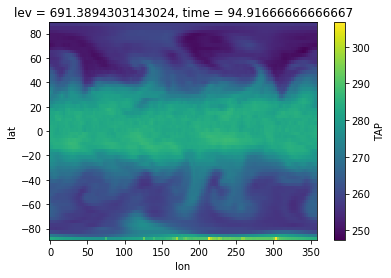

In [11]:
ds['TAP'].isel(time=-2, lev=20).plot()

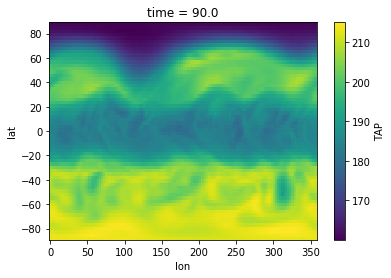

In [16]:
ds2['TAP'].isel(time=-2).min('lev').plot()

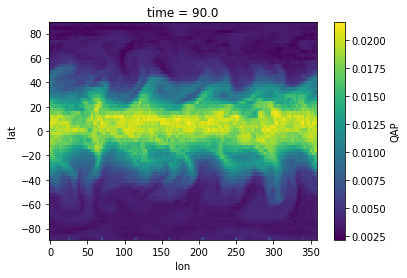

In [18]:
ds2['QAP'].isel(time=-2).max('lev').plot()

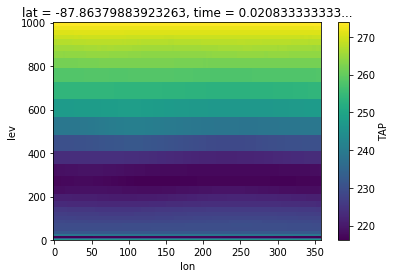

In [21]:
ds['TAP'].isel(time=1, lat=0).plot()

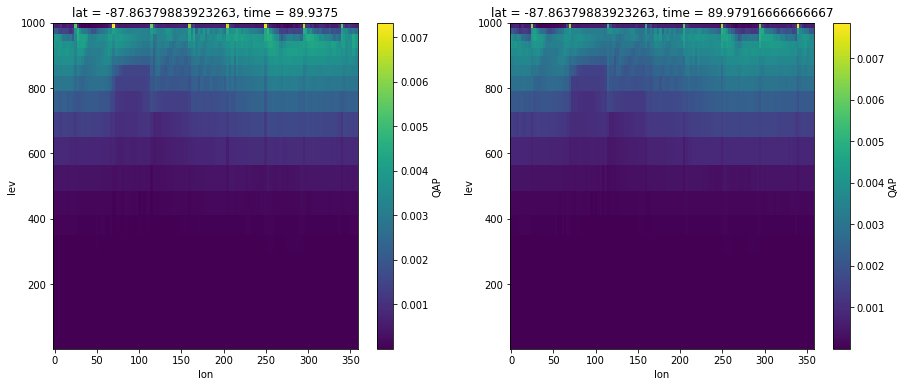

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ds2['QAP'].isel(time=-5, lat=0).plot(ax=axes[0])
ds2['QAP'].isel(time=-3, lat=0).plot(ax=axes[1])

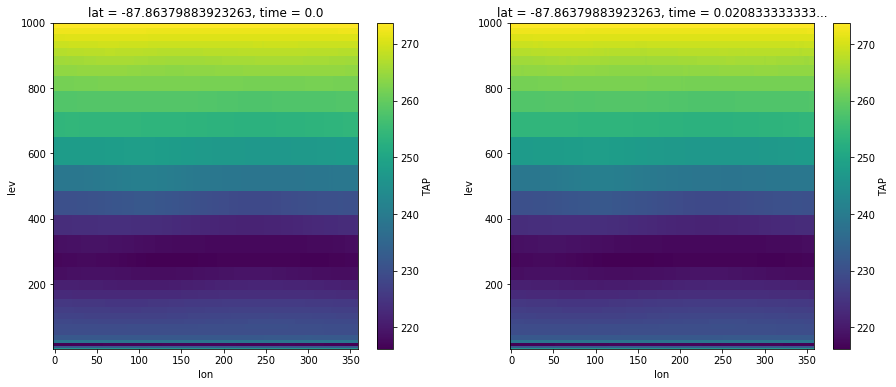

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ds2['TAP'].isel(time=0, lat=0).plot(ax=axes[0])
ds2['TAP'].isel(time=1, lat=0).plot(ax=axes[1])

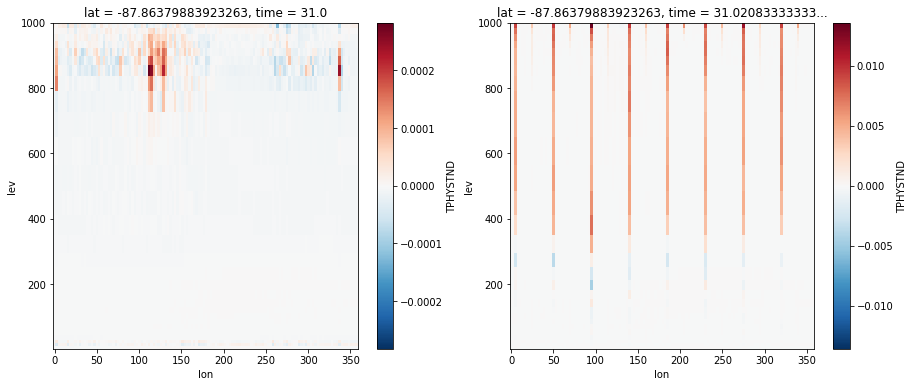

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ds2['TPHYSTND'].isel(time=1488, lat=0).plot(ax=axes[0])
ds2['TPHYSTND'].isel(time=1489, lat=0).plot(ax=axes[1]);

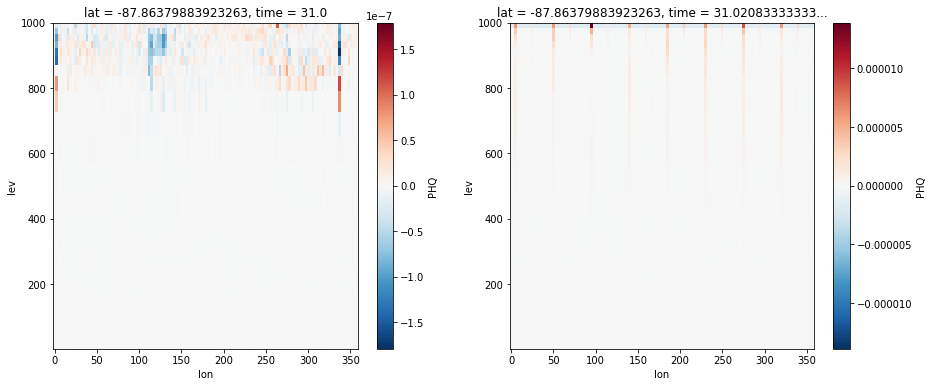

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ds2['PHQ'].isel(time=1488, lat=0).plot(ax=axes[0])
ds2['PHQ'].isel(time=1489, lat=0).plot(ax=axes[1]);

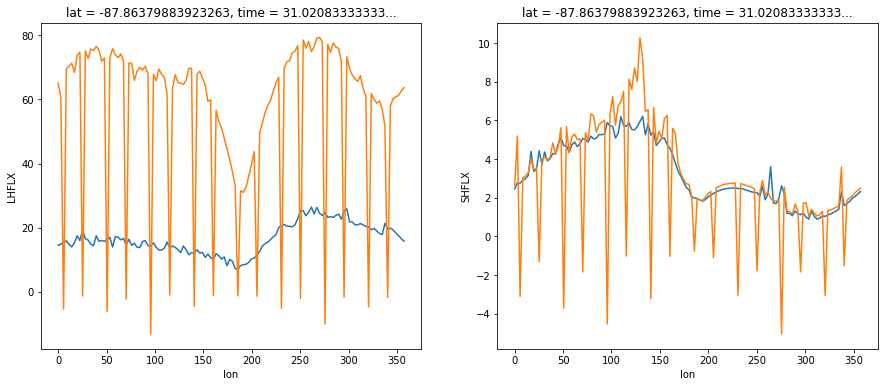

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ds2['LHFLX'].isel(time=1488, lat=0).plot(ax=axes[0])
ds2['LHFLX'].isel(time=1489, lat=0).plot(ax=axes[0])
ds2['SHFLX'].isel(time=1488, lat=0).plot(ax=axes[1])
ds2['SHFLX'].isel(time=1489, lat=0).plot(ax=axes[1])

In [51]:
ds2.time[1488], ds2.time[1489]

(<xarray.DataArray 'time' ()>
 array(31.)
 Coordinates:
     time     float64 31.0
 Attributes:
     long_name:  time
     units:      days since 0000-01-01 00:00:00
     calendar:   noleap
     bounds:     time_bnds, <xarray.DataArray 'time' ()>
 array(31.020833)
 Coordinates:
     time     float64 31.02
 Attributes:
     long_name:  time
     units:      days since 0000-01-01 00:00:00
     calendar:   noleap
     bounds:     time_bnds)

In [53]:
dref = xr.open_dataset('/scratch/05488/tg847872/galen_sp/AndKua_aqua_SPCAM3.0_sp.cam2.h1.0000-02-01-00000.nc',
                       decode_times=False)

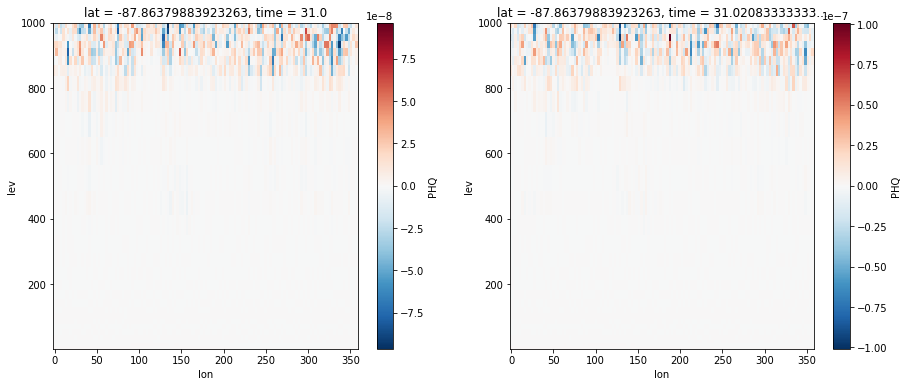

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
dref['PHQ'].isel(time=0, lat=0).plot(ax=axes[0])
dref['PHQ'].isel(time=1, lat=0).plot(ax=axes[1]);

In [47]:
ds2

<xarray.Dataset>
Dimensions:       (chars: 8, crm_x: 8, crm_y: 1, crm_z: 28, ilev: 31, isccp_prs: 7, isccp_prstau: 49, isccp_tau: 7, lat: 64, lev: 30, lon: 128, tbnd: 2, time: 4322)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * lon           (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * crm_x         (crm_x) float64 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0
  * crm_y         (crm_y) float64 0.0
  * crm_z         (crm_z) float64 992.6 976.3 957.5 936.2 912.6 887.0 859.5 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 30.67 45.87 63.32 ...
  * isccp_prs     (isccp_prs) float64 90.0 245.0 375.0 500.0 620.0 740.0 900.0
  * isccp_tau     (isccp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * isccp_prstau  (isccp_prstau) float64 90.0 90.0 90.0 90.01 90.02 90.04 ...
  * time          (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 ...

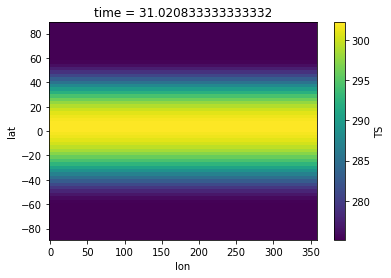

In [48]:
ds2['TS'].isel(time=1489).plot()

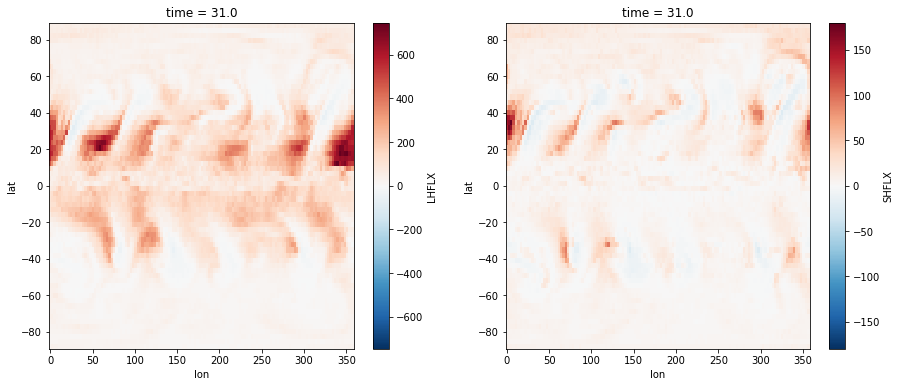

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ds['LHFLX'].isel(time=1488).plot(ax=axes[0])
ds['SHFLX'].isel(time=1488).plot(ax=axes[1])

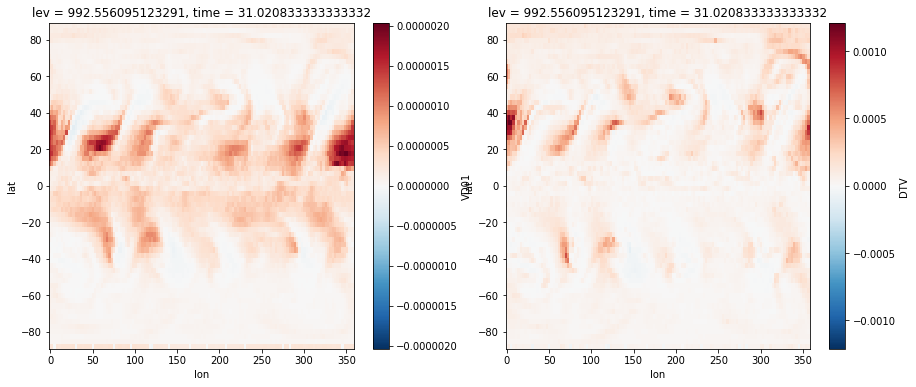

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ds['VD01'].isel(time=1489, lev=-1).plot(ax=axes[0])
ds['DTV'].isel(time=1489, lev=-1).plot(ax=axes[1])